Objective:- The aim of this project is to build a predictive model and find out the sales of each product at a particular store.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import *
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders
import category_encoders as ce

We will import common libraries which will be useful is our analysis

In [31]:
Train_data=pd.read_csv("C:\wallmart data\Test.csv")
Test_data=pd.read_csv("C:\wallmart data\Train.csv")

Importing our train dataset into our enviournment

Now first we will work on our Train data, fit the model in this dataset and then finally we will test that model in our test dataset

But we need to preprocess both the datas in order to fit the model accurately 

In [32]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [33]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In both the datasets we can see the NaN values which we have to remove from the data

In [34]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [35]:
Train_data[Train_data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


<AxesSubplot:>

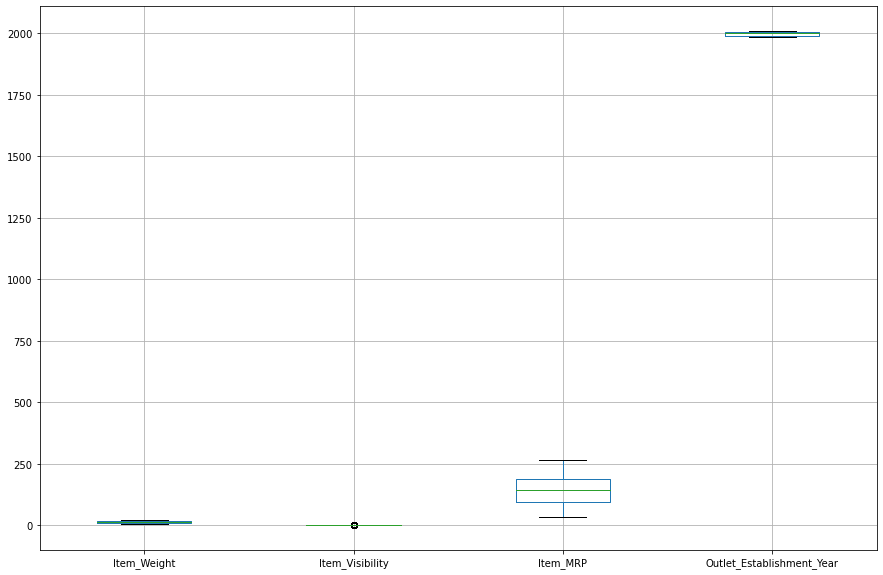

In [36]:
plt.figure(figsize=(15,10))
Train_data.boxplot()

In [37]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [38]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
Train_data=Train_data.dropna()
Test_data=Test_data.dropna()

In [40]:
Train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [41]:
Test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

So now based on our objeective we would do the feature selection which means we will drop the unwanted columns which are unneccesary for our data

In [42]:
Train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
Test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

We have removed the columns "Item_Identifier" and "Outlet_Identifier" from our data set as it is just a labels.

In [43]:
#Cleaning Data
Train_data=Train_data.replace("LF", "Low Fat")
Train_data=Train_data.replace("reg", "Regular")

Now we will label the data columns like Item fat content item tye etc. In short we will label every catogerical data into numeric values like 0,1,2,3.... using one hot encoding

In [44]:
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='Item_Fat_Content',handle_unknown='return_nan',return_df=True,use_cat_names=True)
Train_data_encoded = encoder.fit_transform(Train_data)
encoder=ce.OneHotEncoder(cols='Item_Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
Train_data_encoded = encoder.fit_transform(Train_data_encoded)
encoder=ce.OneHotEncoder(cols='Outlet_Size',handle_unknown='return_nan',return_df=True,use_cat_names=True)
Train_data_encoded = encoder.fit_transform(Train_data_encoded)
encoder=ce.OneHotEncoder(cols='Outlet_Location_Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
Train_data_encoded = encoder.fit_transform(Train_data_encoded)
encoder=ce.OneHotEncoder(cols='Outlet_Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
Train_data_encoded = encoder.fit_transform(Train_data_encoded)
Train_data_encoded

,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Visibility,Item_Type_Snack Foods,Item_Type_Fruits and Vegetables,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Hard Drinks,...,Item_MRP,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,20.750,1.0,0.0,0.0,0.007565,1.0,0.0,0.0,0.0,0.0,...,107.8622,1999,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,9.800,0.0,1.0,0.0,0.063817,0.0,1.0,0.0,0.0,0.0,...,117.1492,1997,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,19.350,0.0,1.0,0.0,0.082602,0.0,0.0,1.0,0.0,0.0,...,50.1034,2009,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
13,4.785,1.0,0.0,0.0,0.092738,0.0,0.0,0.0,1.0,0.0,...,122.3098,1999,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14,16.750,1.0,0.0,0.0,0.021206,0.0,0.0,0.0,0.0,1.0,...,52.0298,1987,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5673,7.070,1.0,0.0,0.0,0.094053,1.0,0.0,0.0,0.0,0.0,...,116.0834,2009,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5674,15.700,1.0,0.0,0.0,0.030704,0.0,0.0,0.0,0.0,1.0,...,43.2770,1997,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5675,13.000,0.0,1.0,0.0,0.070411,1.0,0.0,0.0,0.0,0.0,...,63.4484,1999,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5676,10.500,0.0,1.0,0.0,0.013496,1.0,0.0,0.0,0.0,0.0,...,141.3154,1997,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
Train_data = Train_data_encoded.apply(LabelEncoder().fit_transform)
Test_data = Test_data.apply(LabelEncoder().fit_transform)
#df_test = df_test.apply(LabelEncoder().fit_transform)

In [46]:
Train_data

,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Visibility,Item_Type_Snack Foods,Item_Type_Fruits and Vegetables,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Hard Drinks,...,Item_MRP,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,394,1,0,0,41,1,0,0,0,0,...,900,2,1,0,0,1,0,0,1,0
5,278,0,1,0,1670,0,1,0,0,0,...,1071,1,0,1,0,1,0,0,1,0
6,380,0,1,0,2041,0,0,1,0,0,...,230,4,1,0,0,0,1,0,0,1
13,5,1,0,0,2208,0,0,0,1,0,...,1175,2,1,0,0,1,0,0,1,0
14,354,1,0,0,402,0,0,0,0,1,...,256,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5673,134,1,0,0,2240,1,0,0,0,0,...,1050,4,1,0,0,0,1,0,0,1
5674,343,1,0,0,777,0,0,0,0,1,...,139,1,0,1,0,1,0,0,1,0
5675,313,0,1,0,1800,1,0,0,0,0,...,408,2,1,0,0,1,0,0,1,0
5676,285,0,1,0,175,1,0,0,0,0,...,1350,1,0,1,0,1,0,0,1,0


In [53]:
Test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,279,1,395,4,3582,2,1,0,0,1886
1,56,2,512,14,295,4,1,2,1,152
2,369,1,421,10,1874,2,1,0,0,1161
4,261,1,0,9,391,0,0,2,0,506
5,291,2,0,0,354,4,1,2,1,224
...,...,...,...,...,...,...,...,...,...,...
8517,402,4,3059,5,2644,1,2,0,0,1845
8518,124,1,2250,13,3192,0,0,2,0,1492
8520,293,1,1343,8,776,3,2,1,0,629
8521,147,2,4018,13,1187,4,1,2,1,1015


In [56]:
y3 = Train_data.iloc[:, -1].values

In [57]:
x3 = Train_data.iloc[:, :-1].values


In [58]:
x3

array([[394,   1,   0, ...,   0,   0,   1],
       [278,   0,   1, ...,   0,   0,   1],
       [380,   0,   1, ...,   1,   0,   0],
       ...,
       [313,   0,   1, ...,   0,   0,   1],
       [285,   0,   1, ...,   0,   0,   1],
       [173,   0,   1, ...,   1,   0,   0]], dtype=int64)

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x3, y3)

In [65]:
Y_pre_lr=lr.predict(x3)
Y_pre_lr

array([ 4.05786516e-14, -6.93889390e-16,  1.00000000e+00, ...,
        1.62647673e-14, -6.24500451e-15,  1.00000000e+00])

In [66]:
model.score(x3, y3)

1.0

In [61]:
x3.shape
#y3.shape

(3099, 30)

In [62]:
Y_pred_lr=lr.predict(x3)
print(r2_score(y3, Y_pred_lr))
print(mean_absolute_error(y3, Y_pred_lr))
print(np.sqrt(mean_squared_error(y3, Y_pred_lr)))

NameError: name 'r2_score' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(x3,y3)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [ ]:
Y_pred_rf=rf.predict(x3)
print(r2_score(y3, Y_pred_rf))
print(mean_absolute_error(y3, Y_pred_rf))
print(np.sqrt(mean_squared_error(y3, Y_pred_rf)))

In [ ]:
Y_pred_rf=rf.predict(x3)
print(Y_pred_rf)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x3.values,i) for i in range (x3.shape[1])]
vif['features']=x3.columns
print(vif)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
dataplot = sns.heatmap(Train_data.corr(), cmap="YlGnBu", annot=False)
# displaying heatmap
plt.show()

In [ ]:
X=Train_data.drop('Item_Outlet_Sales',axis=1)
Y=Train_data['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)
X_test

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

In [ ]:
X_test_std

In [ ]:
lr.fit(X_train_std, Y_train)
Y_pre_lr=lr.predict(X_test_std)

In [ ]:
print(r2_score(Y_test, Y_pre_lr))
print(mean_absolute_error(Y_test, Y_pre_lr))
print(np.sqrt(mean_squared_error(Y_test, Y_pre_lr)))

In [ ]:
# Split the dataset into two subsets: one with missing values and one without missing values in Item_Weight column
missing_Train_data = Train_data[Train_data['Item_Weight'].isnull()]
not_missing_Train_data = Train_data[~Train_data['Item_Weight'].isnull()]
missing_Train_data = missing_Train_data.drop(['Outlet_Size'], axis=1)
not_missing_Train_data = not_missing_Train_data.drop(['Outlet_Size'], axis=1)

In [ ]:
not_missing_Train_data

In [ ]:
X_train = not_missing_Train_data[['Item_Fat_Content']]
y_train = not_missing_Train_data['Item_Weight']
X_test = missing_Train_data[['Item_Fat_Content']]

In [ ]:
X_train=X_train.replace("Low Fat",0)
X_train=X_train.replace("Regular",1)
X_train

In [ ]:
y_train

In [ ]:
X_test=X_test.replace("Low Fat",0)
X_test=X_test.replace("Regular",1)
X_test

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predict the missing values
predicted_values = model.predict(X_test)

# Fill the missing values in the original dataset with the predicted values
data.loc[Train_data['Item_Weight'].isnull(), 'Item_Weight'] = predicted_values

In [67]:
#Training XGBoost On training Set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
#Applying K fold validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))